In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('../netflix.mplstyle')

palette = {'primary': '#221f1f', 'secondary': '#b20710', 'accent': '#e50914', 'tertiary': '#f5f5f1'}

In [2]:
reviews = pd.read_csv('../data/reviews_clean.csv', index_col='review_id')
reviews

,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,total,helpful,unhelpful
review_id,,,,,,,,,,
5704482,raeldor-96879,After Life,9.0,Very Strong Season 2,3 May 2020,0,"I enjoyed the first season, but I must say I t...",1,1,0
5704483,dosleeb,The Valhalla Murders,6.0,Icelandic detectives?,3 May 2020,0,I know Iceland is a small country and police d...,2,2,0
5704493,UniqueParticle,Unstoppable,8.0,Excellent last film of legendary Director Tony...,3 May 2020,0,A suspenseful thrilling adventure about a loos...,4,3,1
5704496,Hellooo1234321,Dangerous Lies,NaN,Not bad,3 May 2020,0,Highlight was Camila Mendes exceptional acting...,3,2,1
5704507,indieevan,The Master,8.0,"Great Potential, Less Great Execution",3 May 2020,0,"The premise was a 10, but the execution left a...",1,1,0
...,...,...,...,...,...,...,...,...,...,...
98919,compsecure,Point Blank,NaN,role made for the original 60s action man,23 April 2004,0,This was a movie made for Marvin. Whether by d...,44,33,11
98920,kyle-garabadian,Point Blank,9.0,Point Blank is one of the most influential fil...,12 June 2004,0,Point Blank is one of those lost gems from the...,119,97,22
98921,sol-kay,Point Blank,8.0,John Boorman's hypnotic & stylish 1967 crime t...,14 July 2004,0,"****SPOILERS***** Mal Reese, John Vernon, took...",4,2,2


In [3]:
movie_mean_scores = reviews.groupby(['movie'])['rating'].mean()
movie_total_reviews = reviews.groupby(['movie'])['rating'].count()

movie_scores = pd.concat({'mean': movie_mean_scores, 'n_reviews': movie_total_reviews}, axis=1)

movie_scores.loc[['Bee Movie', 'Person of Interest']]

,mean,n_reviews
movie,,
Bee Movie,6.064189,296
Person of Interest,8.743590,351


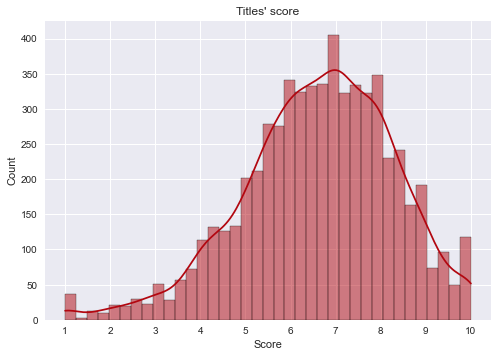

In [4]:
# movie_scores.plot(kind='hist', y='mean', bins=10)
fig, ax = plt.subplots()
sns.histplot(movie_scores['mean'], kde=True, color=palette['secondary'], ax=ax)

ax.set_title('Titles\' score')
ax.set_xlabel('Score')
ax.set_xticks(range(1, 11));

Text(0.5, 1.0, 'Ratings by users')

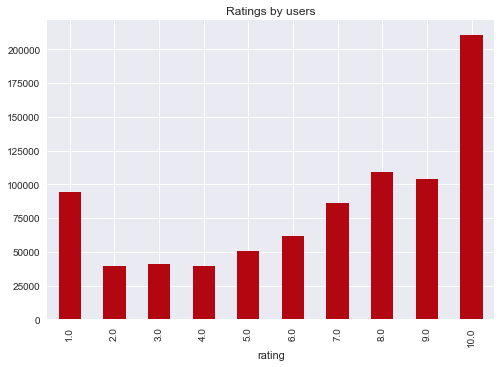

In [5]:
# reviews['rating'].plot(kind='bar', color=palette['secondary'])
fig, ax = plt.subplots()
reviews.groupby('rating')['movie'].count().plot(kind='bar', color=palette['secondary'], ax=ax)

ax.set_title('Ratings by users')

(0.0, 1.05, -0.44000000000000006, 0.44000000000000006)

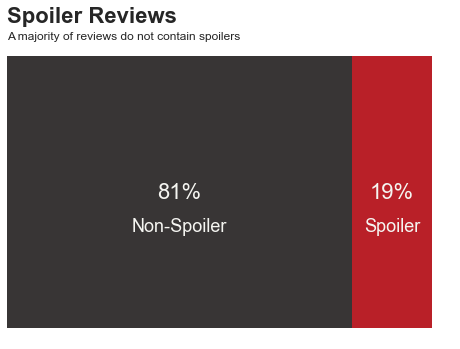

In [6]:
spoiler = reviews['spoiler_tag'].sum() / reviews['spoiler_tag'].count()
non_spoiler = 1 - spoiler

fig, ax = plt.subplots()
ax.barh(0, non_spoiler, alpha=0.9)
ax.barh(0, spoiler, left=non_spoiler, alpha=0.9)

# Title & Subtitle
ax.text(0, 0.5,'Spoiler Reviews', fontsize=22, fontweight='bold')
ax.text(0, 0.45,'A majority of reviews do not contain spoilers', fontsize=12)

ax.text(non_spoiler / 2, 0, f'{non_spoiler * 100:.0f}%', color=palette['tertiary'], va='center', ha='center', fontsize=22)
ax.text(non_spoiler / 2, -0.1, 'Non-Spoiler', color=palette['tertiary'], va='center', ha='center', fontsize=18)
ax.text(non_spoiler + spoiler / 2, 0, f'{spoiler * 100:.0f}%', color=palette['tertiary'], va='center', ha='center', fontsize=22)
ax.text(non_spoiler + spoiler / 2, -0.1, 'Spoiler', color=palette['tertiary'], va='center', ha='center', fontsize=18)

ax.axis('off')

In [21]:
reviews['review_detail_word_count'] = reviews.loc[:, 'review_detail'].str.count("\w+")

In [ ]:
plt, ax = plt.subplots()
sns.histplot(reviews['review_detail_word_count'], kde=True, color=palette['secondary'], ax=ax, bins=10)

(-139.35, 750.0)

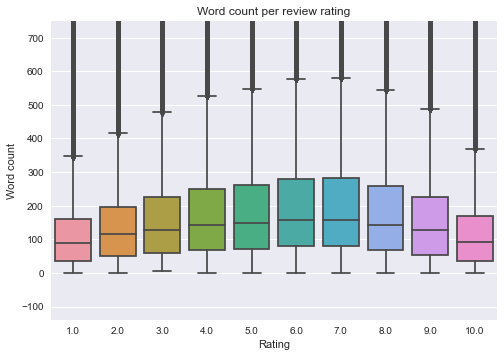

In [20]:
ax = sns.boxplot(x='rating', y='review_detail_word_count', data=reviews)
ax.set_title('Word count per review rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Word count')
# ax.set_ylim(None, 750)

In [22]:
reviews['review_detail_word_count'].describe()

count    909452.000000
mean        177.648633
std         182.121322
min           0.000000
25%          54.000000
50%         128.000000
75%         225.000000
max        2787.000000
Name: review_detail_word_count, dtype: float64

In [28]:
reviews[reviews['review_detail_word_count'] == 0]

,reviewer,movie,rating,review_summary,review_date,spoiler_tag,review_detail,total,helpful,unhelpful,review_detail_word_count
review_id,,,,,,,,,,,
6311897,yasha-62261,Mosul,10.0,💪💪💪💪💪💪💪,26 November 2020,0,👌👌👌👌💪💪💪💪👌👌👌👌💪💪💪💪💪💪💪👌👌👌👌👌👌👌👌💪💪💪💪💪💪💪💪👌👌👌👌👌👌👌,1,0,1,0
5759855,charliedemento,Pulp Fiction,10.0,:),22 May 2020,1,:) :):) :):) :):) :):) :):) :):) :):) :):) :):...,0,0,0,0
6238293,bishoashraf,Paranormal,10.0,Fantastic 👏 👏,5 November 2020,1,😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮😮,5,1,4,0
5933739,karenp-30334,The Kissing Booth 2,1.0,.,25 July 2020,1,... .. ... .. ... .... ..... ..... .... ..... ...,7,2,5,0
5967746,geekydevjoe,The Wrong Missy,8.0,👍🏻,5 August 2020,0,👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻,3,2,1,0
5970469,lgracedoran,The Umbrella Academy,9.0,Really good,6 August 2020,0,👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍 👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍 👍👍👍👍👍👍👍👍...,7,1,6,0
6450730,paulselly,Olympus Has Fallen,6.0,06/01/2021 - Who need North Koreans? :-) :-),7 January 2021,0,:-) :-) .-) :-) :-) :-) .-) :-) :-) :-) .-) :-...,2,2,0,0
4404680,liaal,The Do-Over,7.0,Good movie.,18 October 2018,0,.................................................,3,1,2,0
5229316,alejandrovzerpa,The I-Land,1.0,?,2 November 2019,0,?????? ?????? ?????? ?????? ?????? ?????? ????...,3,2,1,0
